In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler




In [364]:
df = pd.read_excel("train_data.xlsx")


In [254]:
df.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [255]:
df.describe()

,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239


Checking for missing values

In [256]:
missing_values = df.isnull().sum()
print(missing_values)


customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [257]:
print(df.dtypes)


customer_id                     int64
transaction_date       datetime64[ns]
sub_grade                      object
term                           object
home_ownership                 object
cibil_score                     int64
total_no_of_acc                 int64
annual_inc                    float64
int_rate                      float64
purpose                        object
loan_amnt                       int64
application_type               object
installment                   float64
verification_status            object
account_bal                     int64
emp_length                      int64
loan_status                     int64
dtype: object


In [258]:
target_distribution = df['loan_status'].value_counts()
print(target_distribution)


loan_status
1    84016
0    29689
Name: count, dtype: int64


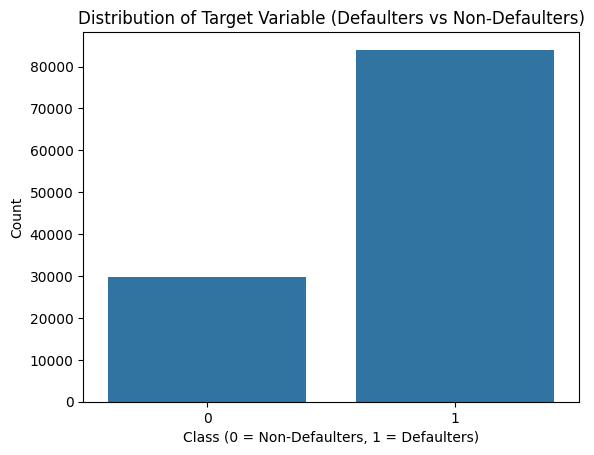

In [259]:
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Target Variable (Defaulters vs Non-Defaulters)')
plt.xlabel('Class (0 = Non-Defaulters, 1 = Defaulters)')
plt.ylabel('Count')
plt.show()

A unique identifier such as username or uid cannot affect the accuracy

In [365]:
df = df.drop('customer_id', axis=1)


checking the correlation between the numeric outcomes and the target variable

In [261]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_with_loan_status = numeric_columns.corr()['loan_status'].sort_values(ascending=False)

print(correlation_with_loan_status)


loan_status        1.000000
cibil_score        0.053848
annual_inc         0.031050
emp_length         0.026188
account_bal        0.014416
total_no_of_acc   -0.008563
installment       -0.060676
loan_amnt         -0.106371
int_rate          -0.278462
Name: loan_status, dtype: float64


Plotting et correlation

<ipython-input-262-3e2408f92a4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_loan_status.index, y=correlation_with_loan_status.values, palette="coolwarm")


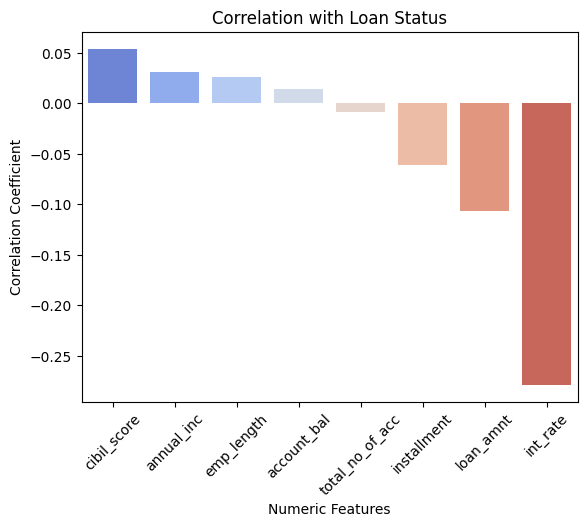

In [262]:
correlation_with_loan_status = correlation_with_loan_status.drop('loan_status')

# Bar Plot
sns.barplot(x=correlation_with_loan_status.index, y=correlation_with_loan_status.values, palette="coolwarm")
plt.title('Correlation with Loan Status')
plt.xlabel('Numeric Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


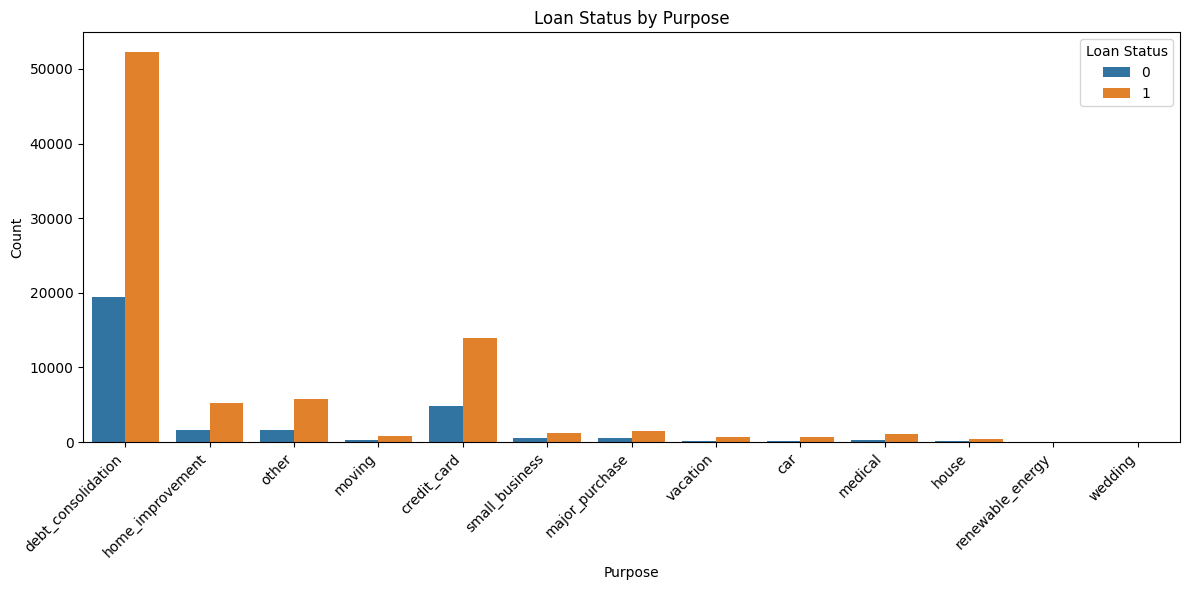

In [366]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status')  # Add a legend
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

Dropping qualitative and catagorical data with very little significance to the target variable

In [263]:
df = df.drop('purpose', axis=1)

In [264]:
df = df.drop('application_type', axis=1)

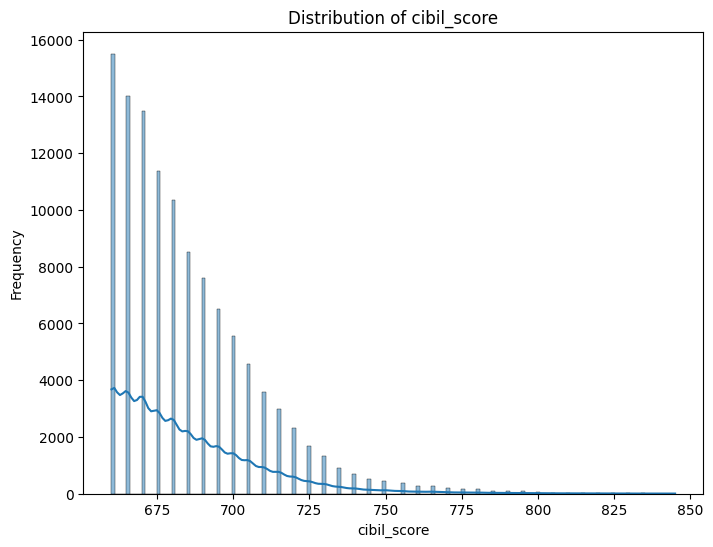

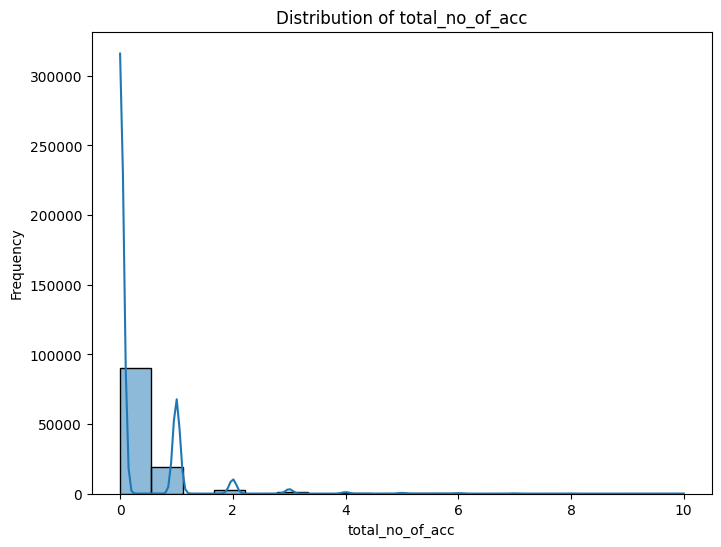

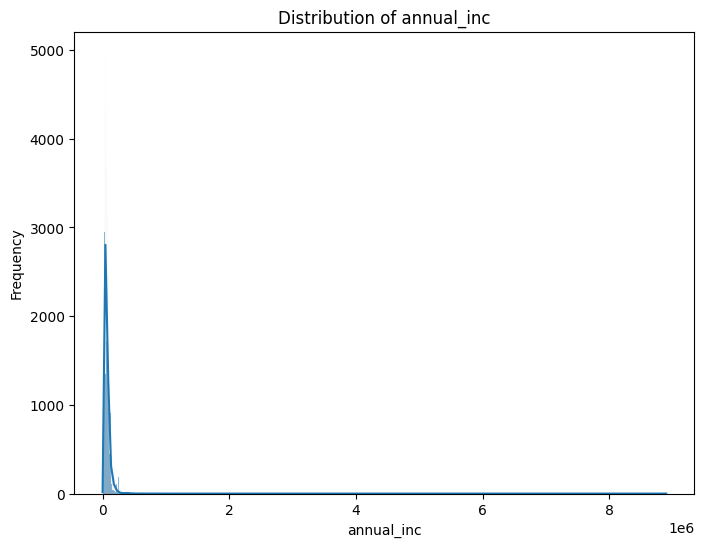

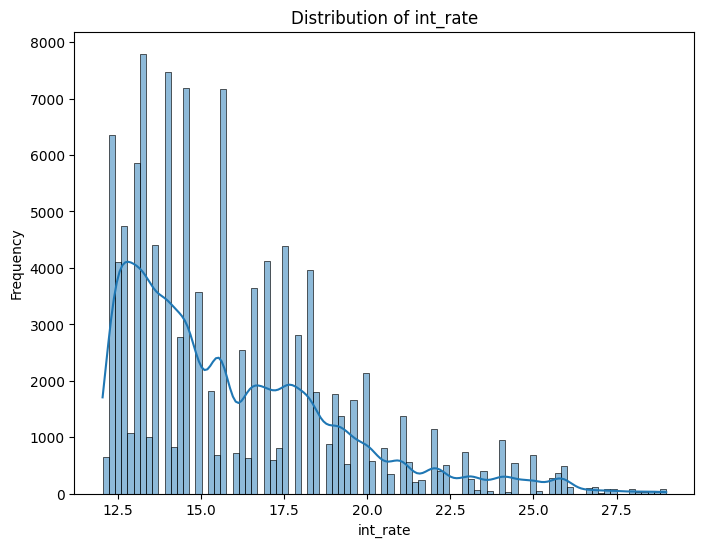

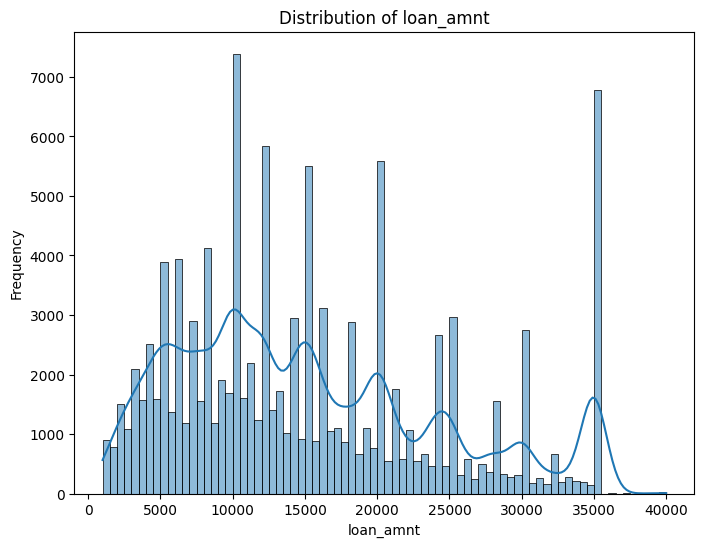

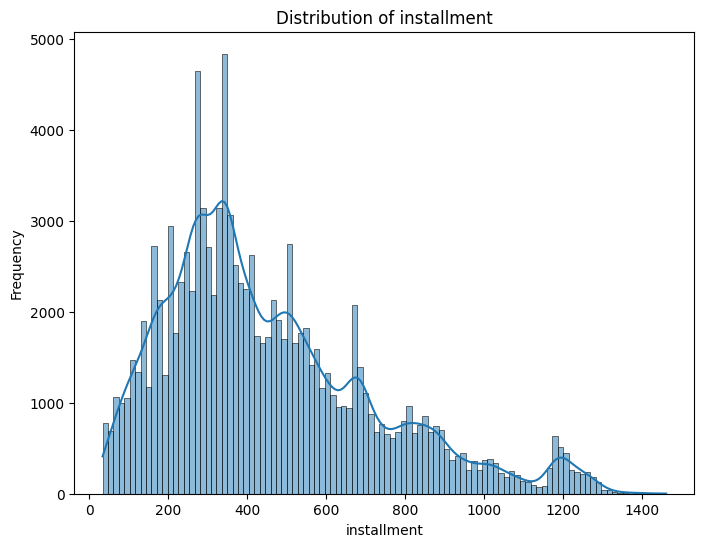

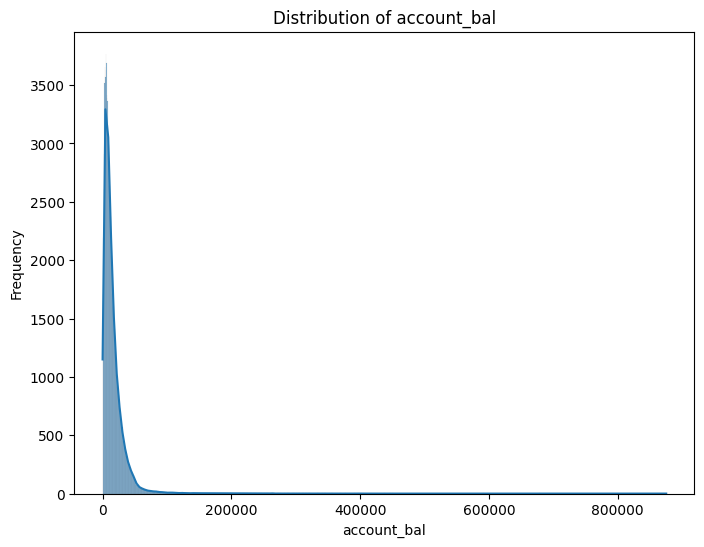

In [367]:
for column in ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

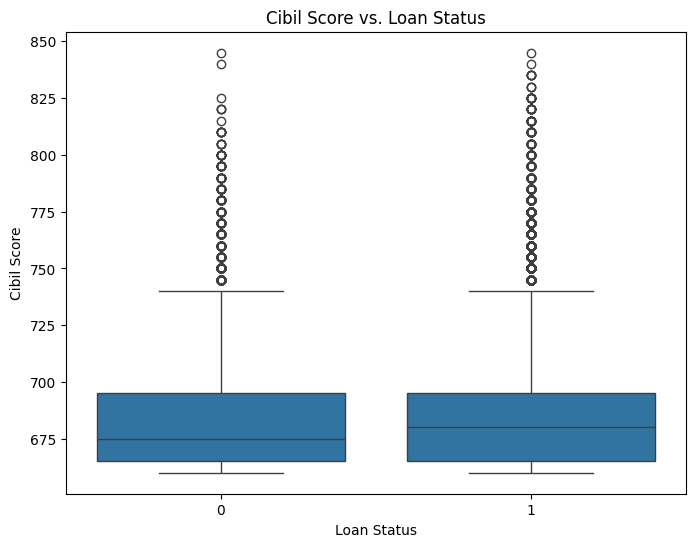

In [368]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df)  # Assuming 'loan_status' indicates default (e.g., 1 for default, 0 for non-default)
plt.title('Cibil Score vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Cibil Score')
plt.show()

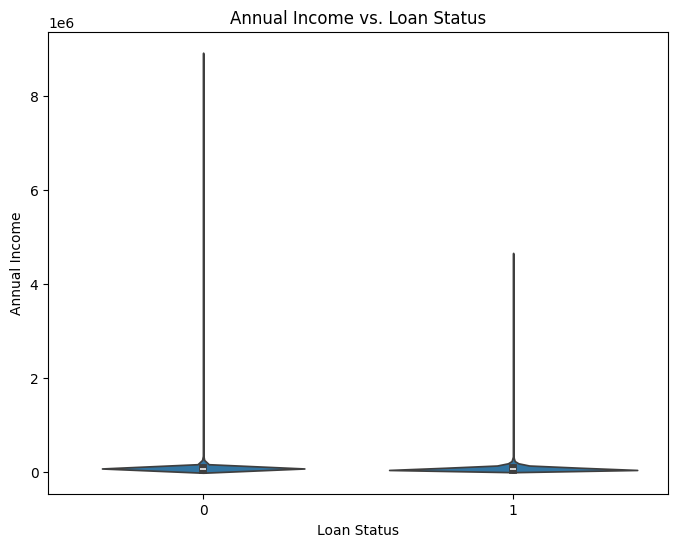

In [369]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

In [370]:
def cap_outliers(df, columns):
    df_capped = df.copy()
    for column in columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)
    return df_capped


In [371]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply the cap_outliers function
df = cap_outliers(df, numeric_columns)

In [372]:
df.describe()

,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,113705,113705.00000,113705.0,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,2015-03-04 22:24:20.769535232,683.80876,0.0,67844.589967,15.923472,15157.755706,450.667038,14140.032637,5.959782,0.738895
min,2014-01-01 00:00:00,660.00000,0.0,0.000000,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2014-08-01 00:00:00,665.00000,0.0,43000.000000,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,2015-04-01 00:00:00,680.00000,0.0,60000.000000,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,2015-10-01 00:00:00,695.00000,0.0,85000.000000,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,2016-03-01 00:00:00,740.00000,0.0,148000.000000,24.655000,38562.500000,1100.215000,40721.000000,11.000000,1.000000
std,NaN,20.84380,0.0,33278.156901,3.135688,9090.247025,258.558932,11066.334369,4.229570,0.439239


In [373]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract loan age
df['loan_age'] = (datetime.now() - df['transaction_date']).dt.days

# Extract year and month
df['transaction_year'] = df['transaction_date'].dt.year
df['transaction_month'] = df['transaction_date'].dt.month

# Drop the original transaction_date if not needed
df.drop('transaction_date', axis=1, inplace=True)

In [374]:
df.head()

,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,loan_age,transaction_year,transaction_month
0,C5,36 months,MORTGAGE,665,0,70000.0,16.24,debt_consolidation,7200.0,Individual,253.99,Verified,4648,11,0,3997,2014,1
1,E5,36 months,MORTGAGE,660,0,65000.0,23.40,home_improvement,6000.0,Individual,233.52,Source Verified,14051,11,1,3997,2014,1
2,D2,36 months,MORTGAGE,660,0,73000.0,17.57,other,8000.0,Individual,287.50,Verified,14885,11,0,3997,2014,1
3,B4,36 months,MORTGAGE,690,0,118000.0,12.85,debt_consolidation,10000.0,Individual,336.22,Source Verified,7542,2,1,3997,2014,1
4,C3,60 months,MORTGAGE,665,0,63000.0,14.98,debt_consolidation,10000.0,Individual,237.80,Verified,6318,11,0,3997,2014,1


In [375]:

df['sub_grade_alpha'] = df['sub_grade'].str[0]
df['sub_grade_num'] = df['sub_grade'].str[1].astype(int)

grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['sub_grade_alpha'] = df['sub_grade_alpha'].map(grade_map)


df.drop('sub_grade', axis=1, inplace=True)


In [376]:
df.head()

,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,loan_age,transaction_year,transaction_month,sub_grade_alpha,sub_grade_num
0,36 months,MORTGAGE,665,0,70000.0,16.24,debt_consolidation,7200.0,Individual,253.99,Verified,4648,11,0,3997,2014,1,3,5
1,36 months,MORTGAGE,660,0,65000.0,23.40,home_improvement,6000.0,Individual,233.52,Source Verified,14051,11,1,3997,2014,1,5,5
2,36 months,MORTGAGE,660,0,73000.0,17.57,other,8000.0,Individual,287.50,Verified,14885,11,0,3997,2014,1,4,2
3,36 months,MORTGAGE,690,0,118000.0,12.85,debt_consolidation,10000.0,Individual,336.22,Source Verified,7542,2,1,3997,2014,1,2,4
4,60 months,MORTGAGE,665,0,63000.0,14.98,debt_consolidation,10000.0,Individual,237.80,Verified,6318,11,0,3997,2014,1,3,3


In [377]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)  # Extract numeric part


In [378]:

df['verification_status'] = df['verification_status'].map({'Verified': 1, 'Source Verified': 0.7, 'Not Verified': 0})




In [379]:
# Combine the alpha and numeric parts into a single value
df['sub_grade_combined'] = (df['sub_grade_alpha']) + df['sub_grade_num']


In [380]:
max(df['total_no_of_acc'])

0

In [381]:
df.drop('sub_grade_alpha', axis=1, inplace=True)
df.drop('sub_grade_num', axis=1, inplace=True)
df.drop('total_no_of_acc',  axis=1, inplace=True)

In [382]:
df.head()

,term,home_ownership,cibil_score,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,loan_age,transaction_year,transaction_month,sub_grade_combined
0,36,MORTGAGE,665,70000.0,16.24,debt_consolidation,7200.0,Individual,253.99,1.0,4648,11,0,3997,2014,1,8
1,36,MORTGAGE,660,65000.0,23.40,home_improvement,6000.0,Individual,233.52,0.7,14051,11,1,3997,2014,1,10
2,36,MORTGAGE,660,73000.0,17.57,other,8000.0,Individual,287.50,1.0,14885,11,0,3997,2014,1,6
3,36,MORTGAGE,690,118000.0,12.85,debt_consolidation,10000.0,Individual,336.22,0.7,7542,2,1,3997,2014,1,6
4,60,MORTGAGE,665,63000.0,14.98,debt_consolidation,10000.0,Individual,237.80,1.0,6318,11,0,3997,2014,1,6


In [383]:
columns_to_normalize = ['int_rate', 'loan_amnt', 'account_bal']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [282]:
df.to_csv('eda_dataset_train.csv', index=False)

In [330]:
test_df = pd.read_csv("eda_dataset_test.csv")

In [346]:
X_train = df[['term', 'loan_age', 'emp_length', 'sub_grade_combined', 'int_rate', 'loan_amnt', 'account_bal', 'cibil_score', 'annual_inc']]
y_train = df['loan_status']

X_test = test_df[['term', 'loan_age', 'emp_length', 'sub_grade_combined', 'int_rate', 'loan_amnt', 'account_bal', 'cibil_score', 'annual_inc']]
y_test = test_df['loan_status']

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [347]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [348]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.6617386162034299

In [349]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.60      0.19      0.29      3055\n           1       0.67      0.93      0.78      5400\n\n    accuracy                           0.66      8455\n   macro avg       0.63      0.56      0.53      8455\nweighted avg       0.64      0.66      0.60      8455\n'

In [350]:
confusion_matrix(y_test, y_pred)

array([[ 589, 2466],
       [ 394, 5006]])

In [352]:
from sklearn.ensemble import RandomForestClassifier


In [353]:
X_train = df[['term', 'loan_age', 'emp_length', 'sub_grade_combined', 'int_rate', 'loan_amnt', 'account_bal', 'cibil_score', 'annual_inc']]
y_train = df['loan_status']

X_test = test_df[['term', 'loan_age', 'emp_length', 'sub_grade_combined', 'int_rate', 'loan_amnt', 'account_bal', 'cibil_score', 'annual_inc']]
y_test = test_df['loan_status']

In [354]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [318]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.6713187463039622

In [355]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.60      0.19      0.29      3055\n           1       0.67      0.93      0.78      5400\n\n    accuracy                           0.66      8455\n   macro avg       0.63      0.56      0.53      8455\nweighted avg       0.64      0.66      0.60      8455\n'

In [356]:
confusion_matrix(y_test, y_pred)

array([[ 589, 2466],
       [ 394, 5006]])

In [357]:
import xgboost as xgb


In [359]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:40:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [360]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.6723832052040213

In [361]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.24      0.35      3055\n           1       0.68      0.92      0.78      5400\n\n    accuracy                           0.67      8455\n   macro avg       0.65      0.58      0.57      8455\nweighted avg       0.66      0.67      0.63      8455\n'

In [362]:
confusion_matrix(y_test, y_pred)

array([[ 743, 2312],
       [ 458, 4942]])